In [1]:
import pandas as pd
df_train = pd.read_csv("NewDataset/Dataset/Train.csv")
df_test = pd.read_csv("NewDataset/Dataset/Test.csv")

In [2]:
df_train.Item_Description

0       Artworking/Typesetting Production Jun 2009 Cha...
1       Auto Leasing Corporate Services Corning Inc /N...
2       Store Management Lease/Rent Deltona Corp Real ...
3       Store Construction General Requirements Coloni...
4       Jul 2015 Aydin Corp Contingent Labor/Temp Labo...
5       Final Site Clean Up 2018Mar Store Construction...
6       Travel and Entertainment Miscellaneous Company...
7       General Contractor General Requirements Final ...
8       Aquila Distributors Inc                       ...
9       Base Rent Store Management Chicago Rivet & Mac...
10      Ground Transportation Travel and Entertainment...
11      Base Rent Store Management Bio Rad Laboratorie...
12      Real Estate Lease/Rent Base Rent Allegheny Ene...
13      First Options Of Chicago, Inc. 2017-Jan  SMAP ...
14      Chesapeake Shores Beach & Country Club I 2012M...
15      Travel and Entertainment Miscellaneous Company...
16      Final Site Clean Up 2007Nov Store Construction...
17      Miscel

In [3]:
df_test.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,15003,VENDOR-2513,GL-6050310,56.13,Travel and Entertainment Miscellaneous Company...
1,15008,VENDOR-1044,GL-6101400,96.56,Final Site Clean Up Store Construction Advance...
2,15013,VENDOR-1254,GL-6101400,55.93,Arabian American Development Co Final Site Cle...
3,15019,VENDOR-1331,GL-2182000,32.62,Corporate Services Contingent Labor/Temp Labor...
4,15020,VENDOR-2513,GL-6050310,25.81,Fortune National Corp Miscellaneous Company Ca...


In [4]:
import re
data_train = []
for i in range(df_train.Item_Description.shape[0]):
    data_train.append(pd.Series(df_train.Item_Description.iloc[i]).str.split("[0-9]{4}.?[ADFJMNOS][a-z]{2}|[ADFJMNOS][a-z]{2}.?[0-9]{4}")[0])

In [5]:
data_test = []
for i in range(df_test.Item_Description.shape[0]):
    data_test.append(pd.Series(df_test.Item_Description.iloc[i]).str.split("[0-9]{4}.?[ADFJMNOS][a-z]{2}|[ADFJMNOS][a-z]{2}.?[0-9]{4}")[0])

In [6]:
train_desc = []
for listdata in data_train:
    train_desc.append(" ".join(listdata))

In [7]:
test_desc = []
for listdata in data_test:
    test_desc.append(" ".join(listdata))

In [8]:
df_train['dateyear']= df_train['Item_Description'].str.extract('([0-9]{4}.?[ADFJMNOS][a-z]{2}|[ADFJMNOS][a-z]{2}.?[0-9]{4})', expand=True)
df_test['dateyear'] = df_test['Item_Description'].str.extract('([0-9]{4}.?[ADFJMNOS][a-z]{2}|[ADFJMNOS][a-z]{2}.?[0-9]{4})', expand=True)

In [9]:
for i in range(len(train_desc)):
    df_train['Item_Description'].iloc[i]= train_desc[i]

C:\Users\ABHISEK\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
for i in range(len(test_desc)):
    df_test['Item_Description'].iloc[i]= test_desc[i]

C:\Users\ABHISEK\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
df_train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,dateyear
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Champion P...,CLASS-1963,Jun 2009
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,2013-Mar
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,Jul2018
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,2005-Dec
4,15006,VENDOR-1331,GL-2182000,63.35,Aydin Corp Contingent Labor/Temp Labor Conti...,CLASS-1376,Jul 2015


In [12]:
df_train['Month']= df_train['dateyear'].str.extract('([ADFJMNOS][a-z]{2})', expand=True)

In [13]:
df_train['Year']= df_train['dateyear'].str.extract('([0-9]{4})', expand=True)

In [14]:
df_test['Month']= df_test['dateyear'].str.extract('([ADFJMNOS][a-z]{2})', expand=True)

In [15]:
df_test['Year']= df_test['dateyear'].str.extract('([0-9]{4})', expand=True)

In [16]:
df_train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,dateyear,Month,Year
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Champion P...,CLASS-1963,Jun 2009,Jun,2009
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,2013-Mar,Mar,2013
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,Jul2018,Jul,2018
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,2005-Dec,Dec,2005
4,15006,VENDOR-1331,GL-2182000,63.35,Aydin Corp Contingent Labor/Temp Labor Conti...,CLASS-1376,Jul 2015,Jul,2015


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))

final_tf_idf_train = tf_idf_vect.fit_transform(df_train['Item_Description'])
final_tf_idf_test = tf_idf_vect.transform(df_test['Item_Description'])

In [18]:
df_train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,dateyear,Month,Year
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Champion P...,CLASS-1963,Jun 2009,Jun,2009
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,2013-Mar,Mar,2013
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,Jul2018,Jul,2018
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,2005-Dec,Dec,2005
4,15006,VENDOR-1331,GL-2182000,63.35,Aydin Corp Contingent Labor/Temp Labor Conti...,CLASS-1376,Jul 2015,Jul,2015


In [19]:
df_train = df_train.drop(['Item_Description','dateyear'], axis=1)
df_test = df_test.drop(['Item_Description','dateyear'], axis=1)

In [20]:
df_train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Product_Category,Month,Year
0,15001,VENDOR-1676,GL-6100410,83.24,CLASS-1963,Jun,2009
1,15002,VENDOR-1883,GL-2182000,51.18,CLASS-1250,Mar,2013
2,15004,VENDOR-1999,GL-6050100,79.02,CLASS-1274,Jul,2018
3,15005,VENDOR-1771,GL-6101400,48.50,CLASS-1522,Dec,2005
4,15006,VENDOR-1331,GL-2182000,63.35,CLASS-1376,Jul,2015


In [21]:
df1_train = pd.DataFrame(final_tf_idf_train.toarray())
df1_test = pd.DataFrame(final_tf_idf_test.toarray())

In [22]:
df2_train = pd.concat([df_train,df1_train], axis=1)
df2_test = pd.concat([df_test,df1_test], axis=1)

In [23]:
df2_train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Product_Category,Month,Year,0,1,2,...,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028
0,15001,VENDOR-1676,GL-6100410,83.24,CLASS-1963,Jun,2009,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15002,VENDOR-1883,GL-2182000,51.18,CLASS-1250,Mar,2013,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15004,VENDOR-1999,GL-6050100,79.02,CLASS-1274,Jul,2018,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15005,VENDOR-1771,GL-6101400,48.50,CLASS-1522,Dec,2005,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15006,VENDOR-1331,GL-2182000,63.35,CLASS-1376,Jul,2015,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df2_test.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Month,Year,0,1,2,3,...,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028
0,15003,VENDOR-2513,GL-6050310,56.13,Oct,2011,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15008,VENDOR-1044,GL-6101400,96.56,Oct,2011,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15013,VENDOR-1254,GL-6101400,55.93,Oct,2008,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15019,VENDOR-1331,GL-2182000,32.62,Jun,2014,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15020,VENDOR-2513,GL-6050310,25.81,Jun,2015,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.preprocessing import OneHotEncoder
import numpy as  np
enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(np.array(df2_train['Vendor_Code']).reshape(-1,1))
df2_train_vendorcode = enc.transform(np.array(df2_train['Vendor_Code']).reshape(-1,1))
df2_test_vendorcode = enc.transform(np.array(df2_test['Vendor_Code']).reshape(-1,1))

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df2_train['Month'])
df2_train['Month'] = le.transform(df2_train['Month'])
df2_test['Month'] = le.transform(df2_test['Month'])

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df2_train['Year'])
df2_train['Year'] = le.transform(df2_train['Year'])
df2_test['Year'] = le.transform(df2_test['Year'])

In [28]:
le = preprocessing.LabelEncoder()
le.fit(df2_train['GL_Code'])
df2_train['GL_Code'] = le.transform(df2_train['GL_Code'])
df2_test['GL_Code'] = le.transform(df2_test['GL_Code'])

In [29]:
df2_train_vendorcode1 = pd.DataFrame(df2_train_vendorcode.toarray(), columns=[c for c in range(6029,7282)])
df2_test_vendorcode1 = pd.DataFrame(df2_test_vendorcode.toarray(), columns=[c for c in range(6029,7282)])

In [30]:
df2_train_y = df2_train['Product_Category']
df2_train = df2_train.drop(['Product_Category', 'Inv_Id','Vendor_Code'], axis=1)
df2_test = df2_test.drop(['Inv_Id','Vendor_Code'], axis=1)

In [31]:
train_data_final = pd.concat([df2_train, df2_train_vendorcode1], axis=1)

In [32]:
test_data_final = pd.concat([df2_test, df2_test_vendorcode1], axis=1)

In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, class_weight='balanced').fit(train_data_final, df2_train_y)

C:\Users\ABHISEK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ABHISEK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
y_pred= clf.predict(train_data_final)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
confusion_matrix(df2_train_y, y_pred)

array([[  5,   0,   0, ...,   0,   0,   0],
       [  0, 174,   2, ...,   0,   0,   0],
       [  0,   0, 451, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   2,   0,   0],
       [  0,   0,   0, ...,   0,   9,   0],
       [  0,   0,   0, ...,   0,   0,  36]], dtype=int64)

In [37]:
accuracy_score(df2_train_y, y_pred)

0.9996406755300036

In [38]:
y_pred= clf.predict(test_data_final)

In [39]:
uniqueValues, occurCount = np.unique(y_pred, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  ['CLASS-1248' 'CLASS-1249' 'CLASS-1250' 'CLASS-1274' 'CLASS-1294'
 'CLASS-1309' 'CLASS-1322' 'CLASS-1376' 'CLASS-1429' 'CLASS-1477'
 'CLASS-1522' 'CLASS-1567' 'CLASS-1652' 'CLASS-1688' 'CLASS-1721'
 'CLASS-1758' 'CLASS-1770' 'CLASS-1805' 'CLASS-1828' 'CLASS-1850'
 'CLASS-1867' 'CLASS-1870' 'CLASS-1919' 'CLASS-1957' 'CLASS-1963'
 'CLASS-1964' 'CLASS-1983' 'CLASS-2003' 'CLASS-2038' 'CLASS-2112'
 'CLASS-2141' 'CLASS-2146' 'CLASS-2241']
Occurrence Count :  [  3  78 192 451  10  11  18 151  18  27 396  36   4   2  56 641   8   4
  47  29   8  17  34   1  80  13  14  17   3  17  48   1  11]


In [40]:
submission_data = pd.concat([df_test,pd.DataFrame(y_pred, columns=['Product_Category'])], axis=1)

In [41]:
submission_data[['Inv_Id','Product_Category']].to_csv('submissions.csv', index=False)

In [7]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
labels = ['CLASS-1963', 'CLASS-1250', 'CLASS-1274', 'CLASS-1522',
       'CLASS-1376', 'CLASS-1758', 'CLASS-2141', 'CLASS-1429',
       'CLASS-1652', 'CLASS-1249', 'CLASS-1721', 'CLASS-1870',
       'CLASS-1828', 'CLASS-2112', 'CLASS-1567', 'CLASS-1309',
       'CLASS-1477', 'CLASS-1805', 'CLASS-1919', 'CLASS-1322',
       'CLASS-1838', 'CLASS-2015', 'CLASS-1850', 'CLASS-2003',
       'CLASS-1248', 'CLASS-1964', 'CLASS-2241', 'CLASS-1867',
       'CLASS-1983', 'CLASS-1294', 'CLASS-1688', 'CLASS-2038',
       'CLASS-1770', 'CLASS-2152', 'CLASS-2146', 'CLASS-1957']

In [9]:
from datetime import datetime
def perform_model(model, X_train, y_train, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_train)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_train, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_train, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_train, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\ABHISEK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.5min finished
C:\Users\ABHISEK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ABHISEK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warni

Done 
 

training_time(HH:MM:SS.ms) - 0:02:40.406249


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.713095


---------------------
|      Accuracy      |
---------------------

    1.0


--------------------
| Confusion Matrix |
--------------------

 [[  5   0   0 ...   0   0   0]
 [  0 176   0 ...   0   0   0]
 [  0   0 451 ...   0   0   0]
 ...
 [  0   0   0 ...   2   0   0]
 [  0   0   0 ...   0   9   0]
 [  0   0   0 ...   0   0  36]]


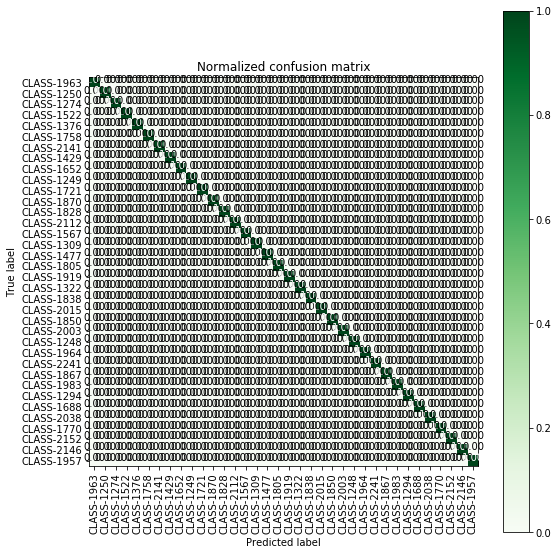

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

  CLASS-1248       1.00      1.00      1.00         5
  CLASS-1249       1.00      1.00      1.00       176
  CLASS-1250       1.00      1.00      1.00       451
  CLASS-1274       1.00      1.00      1.00       986
  CLASS-1294       1.00      1.00      1.00        25
  CLASS-1309       1.00      1.00      1.00        32
  CLASS-1322       1.00      1.00      1.00        28
  CLASS-1376       1.00      1.00      1.00       365
  CLASS-1429       1.00      1.00      1.00        32
  CLASS-1477       1.00      1.00      1.00        50
  CLASS-1522       1.00      1.00      1.00       851
  CLASS-1567       1.00      1.00      1.00        84
  CLASS-1652       1.00      1.00      1.00        15
  CLASS-1688       1.00      1.00      1.00         4
  CLASS-1721       1.00      1.00      1.00       107
  CLASS-1758       1.00      1.00      1.00      1498
  CL

In [11]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=6, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, train_data_final, df2_train_y, class_labels=labels)

In [12]:
y_pred= log_reg_grid.predict(test_data_final)

In [13]:
uniqueValues, occurCount = np.unique(y_pred, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  ['CLASS-1248' 'CLASS-1249' 'CLASS-1250' 'CLASS-1274' 'CLASS-1294'
 'CLASS-1309' 'CLASS-1322' 'CLASS-1376' 'CLASS-1429' 'CLASS-1477'
 'CLASS-1522' 'CLASS-1567' 'CLASS-1652' 'CLASS-1688' 'CLASS-1721'
 'CLASS-1758' 'CLASS-1770' 'CLASS-1805' 'CLASS-1828' 'CLASS-1850'
 'CLASS-1867' 'CLASS-1870' 'CLASS-1919' 'CLASS-1957' 'CLASS-1963'
 'CLASS-1964' 'CLASS-1983' 'CLASS-2003' 'CLASS-2038' 'CLASS-2112'
 'CLASS-2141' 'CLASS-2146' 'CLASS-2241']
Occurrence Count :  [  3  79 191 451  10  11  17 151  18  27 396  36   4   2  54 642   8   6
  47  29   8  17  34   1  80  13  14  17   3  17  48   1  11]


In [14]:
submission_data = pd.concat([df_test,pd.DataFrame(y_pred, columns=['Product_Category'])], axis=1)

In [15]:
submission_data[['Inv_Id','Product_Category']].to_csv('submissions.csv', index=False)

In [58]:
# import pickle
# file = open('train_data_final.pkl', 'wb')
# pickle.dump(train_data_final, file)
# file.close()

In [59]:
# file = open('test_data_final.pkl', 'wb')
# pickle.dump(test_data_final, file)
# file.close()

In [60]:
# file = open('df2_train_y.pkl', 'wb')
# pickle.dump(df2_train_y, file)
# file.close()

In [4]:
# file = open('train_data_final.pkl', 'rb')
# train_data_final = pickle.load(file)
# file.close()

In [5]:
# file = open('test_data_final.pkl', 'rb')
# test_data_final = pickle.load(file)
# file.close()

In [6]:
# file = open('df2_train_y.pkl', 'rb')
# df2_train_y = pickle.load(file)
# file.close()

In [3]:
# import pickle